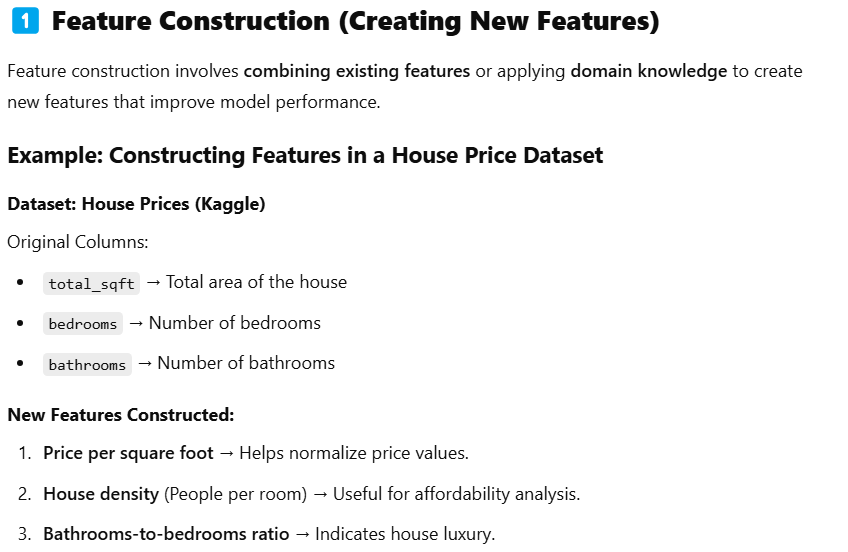

In [1]:
import pandas as pd

# Sample Data
data = {
    "total_sqft": [1500, 1800, 1200, 2500, 3000],
    "price": [300000, 400000, 250000, 600000, 800000],
    "bedrooms": [3, 4, 2, 5, 6],
    "bathrooms": [2, 3, 1, 4, 5]
}

df = pd.DataFrame(data)

# Feature Construction
df["price_per_sqft"] = df["price"] / df["total_sqft"]
df["people_per_room"] = df["bedrooms"] / df["total_sqft"]
df["bath_bed_ratio"] = df["bathrooms"] / df["bedrooms"]

print(df)


   total_sqft   price  bedrooms  bathrooms  price_per_sqft  people_per_room  \
0        1500  300000         3          2      200.000000         0.002000   
1        1800  400000         4          3      222.222222         0.002222   
2        1200  250000         2          1      208.333333         0.001667   
3        2500  600000         5          4      240.000000         0.002000   
4        3000  800000         6          5      266.666667         0.002000   

   bath_bed_ratio  
0        0.666667  
1        0.750000  
2        0.500000  
3        0.800000  
4        0.833333  


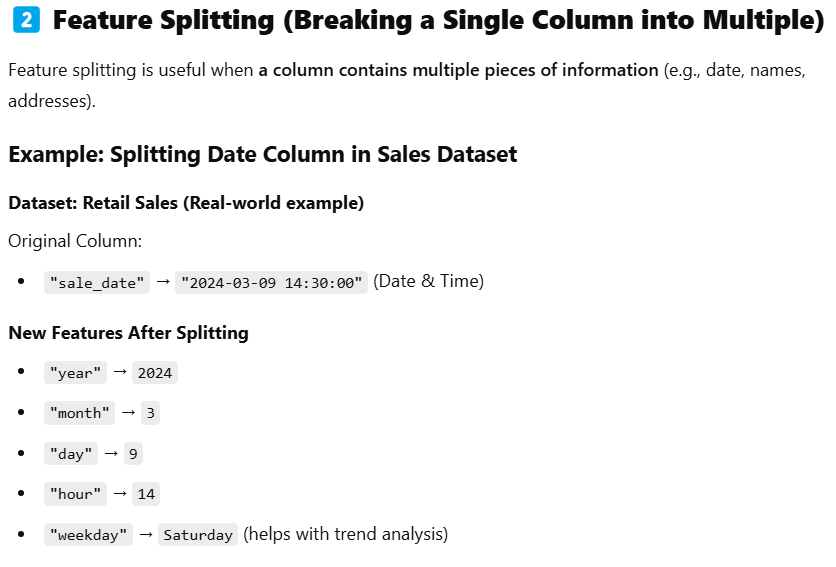

In [2]:
# Sample Data
data = {"sale_date": ["2024-03-09 14:30:00", "2023-08-15 11:45:00", "2022-12-25 20:00:00"]}
df = pd.DataFrame(data)

# Convert to datetime format
df["sale_date"] = pd.to_datetime(df["sale_date"])

# Feature Splitting
df["year"] = df["sale_date"].dt.year
df["month"] = df["sale_date"].dt.month
df["day"] = df["sale_date"].dt.day
df["hour"] = df["sale_date"].dt.hour
df["weekday"] = df["sale_date"].dt.day_name()

print(df)


            sale_date  year  month  day  hour   weekday
0 2024-03-09 14:30:00  2024      3    9    14  Saturday
1 2023-08-15 11:45:00  2023      8   15    11   Tuesday
2 2022-12-25 20:00:00  2022     12   25    20    Sunday


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# Load the seaborn dataset
df = sns.load_dataset("diamonds")

# Display the first few rows
print(df.head())


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [11]:
# Feature Engineering: Construct New Features
df["price_per_carat"] = df["price"] / df["carat"]
df["volume"] = df["x"] * df["y"] * df["z"]
df["depth_ratio"] = df["depth"] / df["table"]

# Encode 'clarity' (Ordinal Encoding)
clarity_mapping = {
    "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "I1": 8
}
df["clarity_encoded"] = df["clarity"].map(clarity_mapping)

# Display modified dataset
print(df.head())


   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   price_per_carat     volume  depth_ratio clarity_encoded  
0      1417.391304  38.202030     1.118182               7  
1      1552.380952  34.505856     0.980328               6  
2      1421.739130  38.076885     0.875385               4  
3      1151.724138  46.724580     1.075862               5  
4      1080.645161  51.917250     1.091379               7  


In [12]:
# Create depth categories
df["depth_category"] = pd.cut(df["depth"], bins=[55, 60, 65, 70, 75], labels=["Low", "Medium", "High", "Very High"])

# Convert depth category to numerical values
depth_mapping = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
df["depth_category_encoded"] = df["depth_category"].map(depth_mapping)

print(df[["depth", "depth_category", "depth_category_encoded"]].head())


   depth depth_category depth_category_encoded
0   61.5         Medium                      2
1   59.8            Low                      1
2   56.9            Low                      1
3   62.4         Medium                      2
4   63.3         Medium                      2


In [13]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Remove rows with NaN values
df = df.dropna()

# Option 2: Fill missing values with the median (recommended)
df = df.fillna(df.median(numeric_only=True))

# Re-run the model training steps


carat                      0
cut                        0
color                      0
clarity                    0
depth                      0
table                      0
price                      0
x                          0
y                          0
z                          0
price_per_carat            0
volume                     0
depth_ratio                0
clarity_encoded            0
depth_category            27
depth_category_encoded    27
dtype: int64


##Without FeatureEngineering

In [14]:
# Select only original features (Baseline Model)
baseline_features = ["carat", "depth", "table"]
X_baseline = df[baseline_features]
y = df["price"]

# Split data
X_train_base, X_test_base, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_base_scaled = scaler.fit_transform(X_train_base)
X_test_base_scaled = scaler.transform(X_test_base)

# Train model
baseline_model = LinearRegression()
baseline_model.fit(X_train_base_scaled, y_train)

# Predict
y_pred_base = baseline_model.predict(X_test_base_scaled)

# Evaluate
r2_base = r2_score(y_test, y_pred_base)
mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))

print(f"Baseline Model:")
print(f"R² Score: {r2_base}")
print(f"MAE: {mae_base}")
print(f"RMSE: {rmse_base}")


Baseline Model:
R² Score: 0.8536408116238241
MAE: 984.1205111960093
RMSE: 1512.193162331693


##With FeatureEngineering

In [15]:
# Select engineered features
engineered_features = ["carat", "price_per_carat", "volume", "depth_ratio", "clarity_encoded", "depth_category_encoded"]
X_engineered = df[engineered_features]

# Split data
X_train_eng, X_test_eng, y_train, y_test = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Scale data
X_train_eng_scaled = scaler.fit_transform(X_train_eng)
X_test_eng_scaled = scaler.transform(X_test_eng)

# Train model
engineered_model = LinearRegression()
engineered_model.fit(X_train_eng_scaled, y_train)

# Predict
y_pred_eng = engineered_model.predict(X_test_eng_scaled)

# Evaluate
r2_eng = r2_score(y_test, y_pred_eng)
mae_eng = mean_absolute_error(y_test, y_pred_eng)
rmse_eng = np.sqrt(mean_squared_error(y_test, y_pred_eng))

print(f"\nFeature Engineered Model:")
print(f"R² Score: {r2_eng}")
print(f"MAE: {mae_eng}")
print(f"RMSE: {rmse_eng}")



Feature Engineered Model:
R² Score: 0.9503070120617407
MAE: 704.3006896062824
RMSE: 881.1398221215945


In [16]:
# Print Comparison
comparison = pd.DataFrame({
    "Metric": ["R² Score", "MAE", "RMSE"],
    "Baseline Model": [r2_base, mae_base, rmse_base],
    "Feature Engineered Model": [r2_eng, mae_eng, rmse_eng]
})

print(comparison)


     Metric  Baseline Model  Feature Engineered Model
0  R² Score        0.853641                  0.950307
1       MAE      984.120511                704.300690
2      RMSE     1512.193162                881.139822
